In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [131]:
from xgboost import XGBClassifier

In [94]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [95]:
df = pd.read_csv('data/creditcard_fraud_detection.csv')

In [96]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [99]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [100]:
sorted_corr = df.corrwith(df['Class']).to_frame(name = 'Correlation').sort_values(by = 'Correlation', ascending= False)

<Axes: >

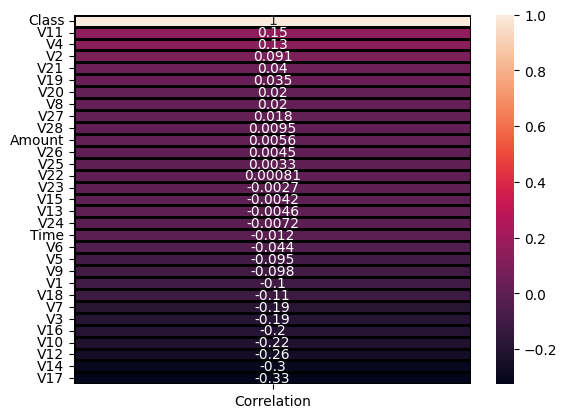

In [101]:
sns.heatmap(sorted_corr, linewidths= 1, linecolor= 'black', annot = True, yticklabels=True)

<Axes: xlabel='Class', ylabel='Count'>

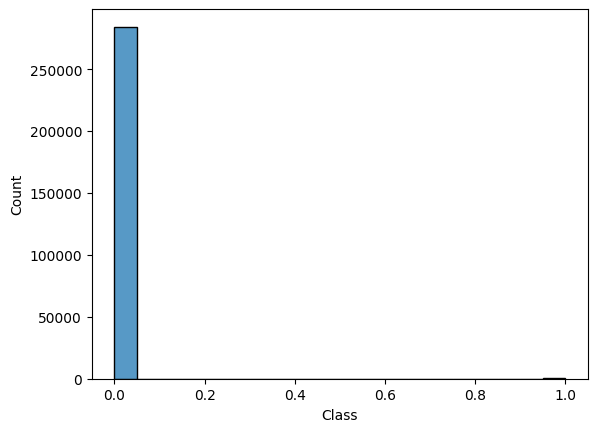

In [102]:
sns.histplot(df['Class'])

In [103]:
def rangeOfCols(df):
    for col in df.columns:
        print(f'{col} --> min: {df[col].min()}   max: {df[col].max()}')

In [104]:
rangeOfCols(df)

Time --> min: 0.0   max: 172792.0
V1 --> min: -56.407509631329   max: 2.45492999121121
V2 --> min: -72.7157275629303   max: 22.0577289904909
V3 --> min: -48.3255893623954   max: 9.38255843282114
V4 --> min: -5.68317119816995   max: 16.8753440335975
V5 --> min: -113.743306711146   max: 34.8016658766686
V6 --> min: -26.1605059358433   max: 73.3016255459646
V7 --> min: -43.5572415712451   max: 120.589493945238
V8 --> min: -73.2167184552674   max: 20.0072083651213
V9 --> min: -13.4340663182301   max: 15.5949946071278
V10 --> min: -24.5882624372475   max: 23.7451361206545
V11 --> min: -4.79747346479757   max: 12.0189131816199
V12 --> min: -18.6837146333443   max: 7.8483920756446
V13 --> min: -5.79188120632084   max: 7.12688295859376
V14 --> min: -19.2143254902614   max: 10.5267660517847
V15 --> min: -4.49894467676621   max: 8.87774159774277
V16 --> min: -14.1298545174931   max: 17.3151115176278
V17 --> min: -25.1627993693248   max: 9.25352625047285
V18 --> min: -9.49874592104677   max: 5.04

In [105]:
numerical_cols = [col for col in df.columns if col != 'Class']

In [106]:
print(numerical_cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


As the attributes are already PCA transformed, we need not reduce them further

In [107]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We have a considerable class imbalance here, hence, we will be resampling the dataset

In this project, we will be comparing performance of 4 datasets

- Unsampled dataset
- Randomly undersampled dataset
- SMOTE oversampled dataset
- SMOTE-Tomek mixsampled dataset

***

# Data Preprocessing

### Unsampled dataset

In [108]:
X = df[numerical_cols]
y = df['Class']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Uncomment from below the line to the end of the next line to create resampled dataset
***

<!-- ### Randomly undersampled dataset -->


<!-- Instantiating the random undersampler -->


In [110]:
# rus = RandomUnderSampler(random_state = 12)
# X_usTrain, y_usTrain = rus.fit_resample(X_train, y_train)

<!-- ### SMOTE oversampled dataset -->


In [111]:
# sm = SMOTE(random_state = 12, sampling_strategy= 'minority')
# X_smTrain , y_smTrain= sm.fit_resample(X_train, y_train)
# y_smTrain.count()

<!-- ### SMOTE-Tomek mixsampled dataset -->


In [112]:
# smt = SMOTETomek(random_state=12)
# X_smtTrain, y_smtTrain = smt.fit_resample(X_train, y_train)

In [113]:
# sns.histplot(y_smtTrain)

In [114]:
# y_smtTrain.count()

In [115]:
# df_Train = pd.concat([X_train, y_train], axis=1)
# df_UTrain = pd.concat([X_usTrain, y_usTrain], axis=1)
# df_SMOTETrain = pd.concat([X_smTrain, y_smTrain], axis=1)
# df_SMOTETomekTrain = pd.concat([X_smtTrain, y_smtTrain], axis=1)

<!-- ### Saving training datasets -->

In [116]:
# df_Train.to_csv('data/normalTrain.csv', index = False)
# df_UTrain.to_csv('data/underTrain.csv', index = False)
# df_SMOTETrain.to_csv('data/SMOTETrain.csv', index = False)
# df_SMOTETomekTrain.to_csv('data/SMOTETomekTrain.csv', index = False)

***

In [117]:
## Loading datasets created above

df_Train = pd.read_csv('data/normalTrain.csv')
df_UTrain = pd.read_csv('data/underTrain.csv')
df_SMOTETrain = pd.read_csv('data/SMOTETrain.csv')
df_SMOTETomekTrain = pd.read_csv('data/SMOTETomekTrain.csv')

In [118]:
datasets = [df_Train, df_UTrain, df_SMOTETrain, df_SMOTETomekTrain]

Scaling all datasets using MinMaxScaler (Normalization)

In [119]:
mmScale = MinMaxScaler()

In [120]:
X_scaled = []
y_for_X_scaled = []

In [121]:
def datasetScaler(list):
    for dset in list:
        scaled_df = dset.copy(deep=True)

        features = scaled_df.drop(columns='Class')
        labels = scaled_df['Class']

        scaled_features = mmScale.fit_transform(features)

        scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=dset.index)

        X_scaled.append(scaled_df)
        y_for_X_scaled.append(labels)

In [122]:
datasetScaler(datasets)

In [123]:
for ds in X_scaled:
    print('\n')
    rangeOfCols(ds)



Time --> min: 0.0   max: 1.0
V1 --> min: 0.0   max: 1.0
V2 --> min: 0.0   max: 1.0
V3 --> min: 0.0   max: 1.0
V4 --> min: 0.0   max: 1.0
V5 --> min: 0.0   max: 0.9999999999999999
V6 --> min: 0.0   max: 0.9999999999999999
V7 --> min: 0.0   max: 1.0
V8 --> min: 0.0   max: 1.0
V9 --> min: 0.0   max: 1.0
V10 --> min: 0.0   max: 1.0
V11 --> min: 0.0   max: 1.0
V12 --> min: 0.0   max: 1.0
V13 --> min: 0.0   max: 1.0
V14 --> min: 0.0   max: 0.9999999999999999
V15 --> min: 0.0   max: 1.0
V16 --> min: 0.0   max: 1.0
V17 --> min: 0.0   max: 1.0
V18 --> min: 0.0   max: 1.0
V19 --> min: 0.0   max: 1.0
V20 --> min: 0.0   max: 1.0
V21 --> min: 0.0   max: 0.9999999999999999
V22 --> min: 0.0   max: 1.0
V23 --> min: 0.0   max: 1.0
V24 --> min: 0.0   max: 0.9999999999999998
V25 --> min: 0.0   max: 1.0
V26 --> min: 0.0   max: 1.0
V27 --> min: 0.0   max: 1.0
V28 --> min: 0.0   max: 1.0
Amount --> min: 0.0   max: 1.0


Time --> min: 0.0   max: 1.0
V1 --> min: 0.0   max: 0.9999999999999999
V2 --> min: 0.0

# Model Training with Cross Validation

We will be testing these models:

- Logistic Regression (Cost insensitive and cost sensitive)
- Decision Tree (Cost insensitive and cost sensitive)
- XGBoost (Cost insensitive and cost sensitive)
- Random Forest (Cost insensitive and cost sensitive)
- KNN (Cost insensitive and cost sensitive)
- Gaussian Naive Bayes (Cost insensitive and cost sensitive)
- Neural Network (Cost insensitive and cost sensitive)
- Deep Neural Network (Cost insensivite and cost sensitive)

We will be testing all combinations of cost sensitive and insensitive models with unsampled and resampled datasets

We will be using a standard heuristic for penalty of wrongful classification of a class

Majority class penalty --> 1
Minority class penalty --> sqrt(majority class population / minority class population)

Here, we are using the **square root** of the majority/minority ratio because the imbalance of majorit to minority class is beyond the threshold of allowance of the penalty increase to simply use the standard, unexponentiated ratio for penalization of wrongful classification 

In [124]:
ratio = df['Class'].value_counts()[0]/df['Class'].value_counts()[1]

In [125]:
ratio

577.8760162601626

In [126]:
class_weights = {'balanced': { 0 : 1,
                               1 : ratio},
                               
                 'sqrt' : { 0 : 1,
                            1 : np.sqrt(ratio)}
                }

#### Models initialized

Logistic Regressor

In [128]:
lgr = LogisticRegression(random_state = 12)

Decision Tree

In [135]:
dTree = DecisionTreeClassifier()

Random Forest

In [136]:
rf = RandomForestClassifier()

K Nearest Neighbors

In [137]:
knn = KNeighborsClassifier()

Gaussian Naive Bayes

In [138]:
gnb = GaussianNB()

# Hyperparameter Tuning

# Evaluation and Metrics

# Feature Importance